## 데이터 정리

In [4]:
import pandas as pd

In [6]:
df = pd.read_csv('../Data/Churn_modelling.csv')

In [7]:
df = df.drop('RowNumber',axis=1)

In [8]:
df.groupby(df['Gender']).size()

Gender
Female    4543
Male      5457
dtype: int64

In [9]:
df.groupby(df['HasCrCard']).size()

HasCrCard
0    2945
1    7055
dtype: int64

In [10]:
df.groupby(df['Geography']).size()

Geography
France     5014
Germany    2509
Spain      2477
dtype: int64

In [11]:
df.groupby(df['IsActiveMember']).size()

IsActiveMember
0    4849
1    5151
dtype: int64

In [12]:
def binary_change(x):
    if x == 1:
        return 'Y'
    if x == 0:
        return 'N'

In [13]:
df.HasCrCard = df.HasCrCard.apply(lambda x: binary_change(x))

In [14]:
df.IsActiveMember = df.IsActiveMember.apply(lambda x: binary_change(x))

In [15]:
df.Exited = df.Exited.apply(lambda x: binary_change(x))

In [16]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,Y,Y,101348.88,Y
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,N,Y,112542.58,N
2,15619304,Onio,502,France,Female,42,8,159660.80,3,Y,N,113931.57,Y
3,15701354,Boni,699,France,Female,39,1,0.00,2,N,N,93826.63,N
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Y,Y,79084.10,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,Y,N,96270.64,N
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,Y,Y,101699.77,N
9997,15584532,Liu,709,France,Female,36,7,0.00,1,N,Y,42085.58,Y
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,Y,N,92888.52,Y


In [17]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


## 데이터 시각화

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
import seaborn as sns

In [29]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   

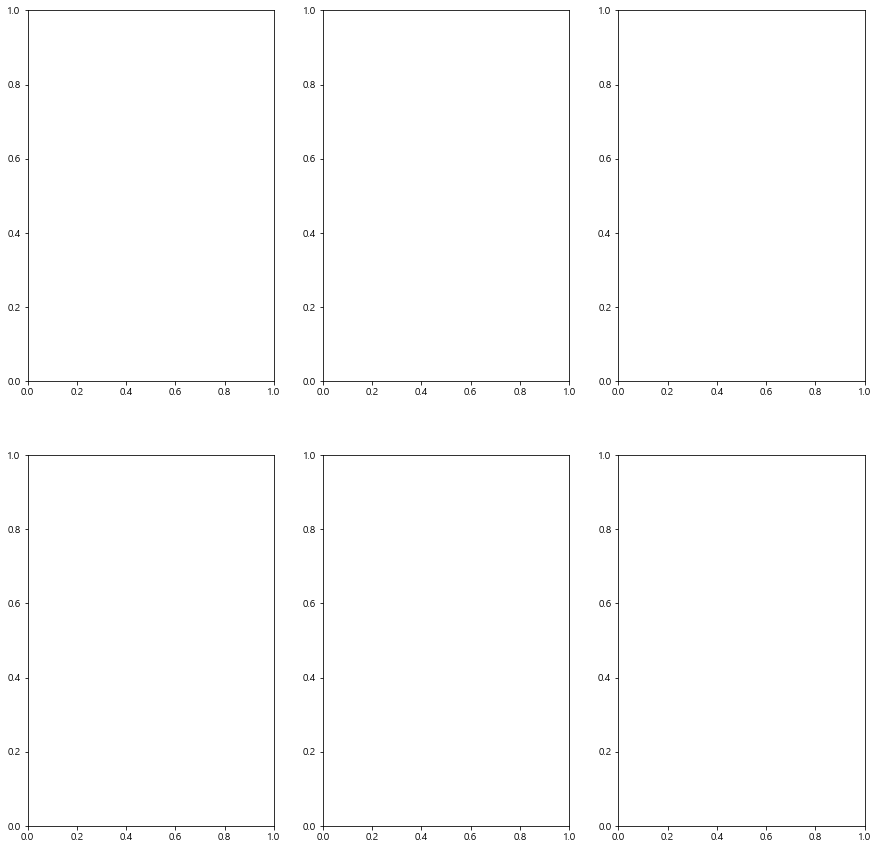

In [43]:
fig, ax = plt.subplots(2,3, figsize=(15,15),facecolor='white')

In [44]:
sns.boxplot(x=df.Exited, y=df.CreditScore,ax=ax[0,0]).set(xlabel='신용점수',ylabel='이탈여부')
sns.boxplot(x=df.Exited, y=df.Age,ax=ax[0,1]).set(xlabel='나이',ylabel='이탈여부')
sns.boxplot(x=df.Exited, y=df.Tenure,ax=ax[0,2]).set(xlabel='거래기간',ylabel='이탈여부')
sns.boxplot(x=df.Exited, y=df.Balance,ax=ax[1,0]).set(xlabel='계좌잔고',ylabel='이탈여부')
sns.countplot(x=df.NumOfProducts, hue=df.Exited, ax=ax[1,1]).set(xlabel='이용중인상품수',ylabel='빈도')
sns.boxplot(x=df.Exited, y=df.EstimatedSalary,ax=ax[1,2]).set(xlabel='추정급여',ylabel='이탈여부')

[Text(594.0235294117648, 0.5, '이탈여부'), Text(0.5, 3.200000000000017, '추정급여')]

In [45]:
fig.tight_layout()

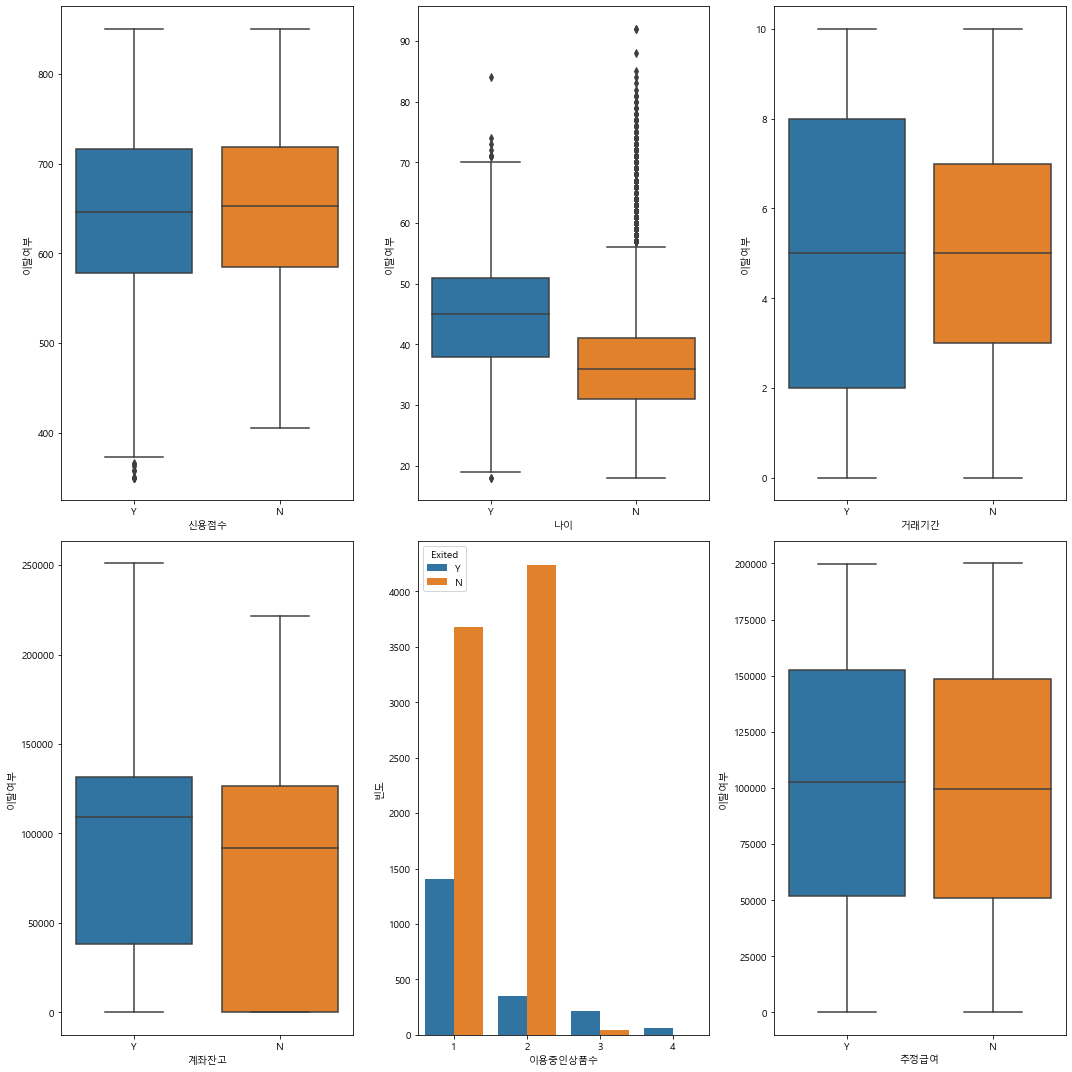

In [46]:
fig

In [48]:
fig.savefig('figure.png')

===================================================================================================================================================

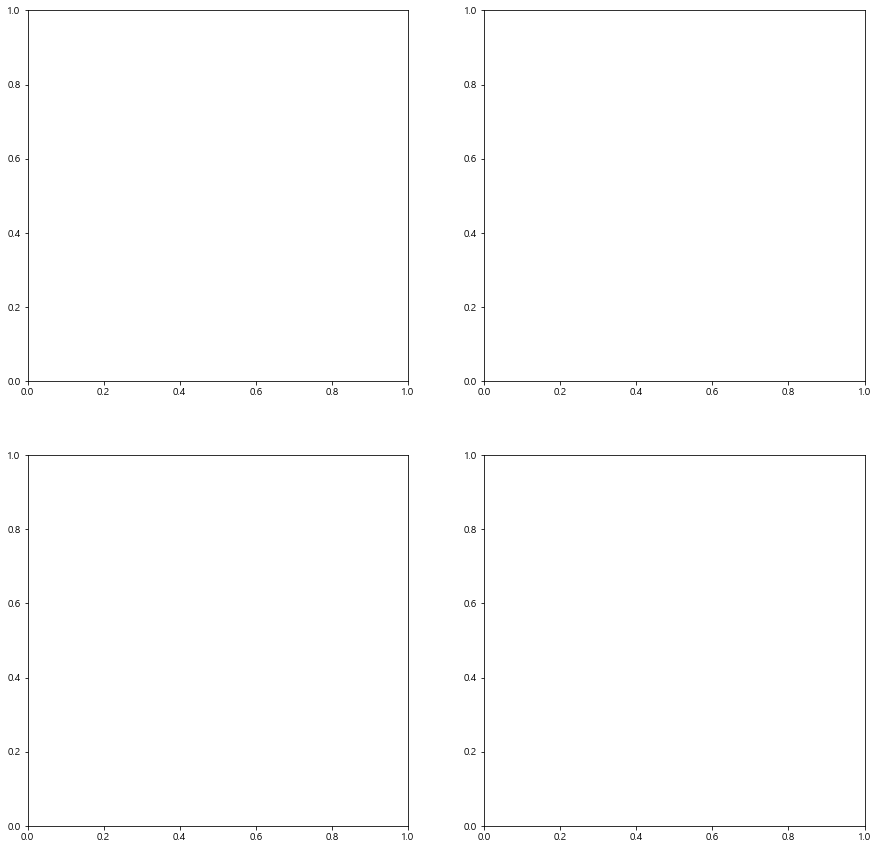

In [38]:
fig, ax = plt.subplots(2,2, figsize=(15,15),facecolor='white')

In [39]:
sns.countplot(x=df.Gender, hue=df.Exited,ax=ax[0,0]).set(xlabel='성별',ylabel='빈도')
sns.countplot(x=df.Geography, hue=df.Exited,ax=ax[0,1]).set(xlabel='국가',ylabel='빈도')
sns.countplot(x=df.IsActiveMember, hue=df.Exited,ax=ax[1,0]).set(xlabel='비휴면고객',ylabel='빈도')
sns.countplot(x=df.HasCrCard, hue=df.Exited,ax=ax[1,1]).set(xlabel='신용카드소유여부',ylabel='빈도')

[Text(459.74545454545444, 0.5, '빈도'), Text(0.5, 3.200000000000017, '신용카드소유여부')]

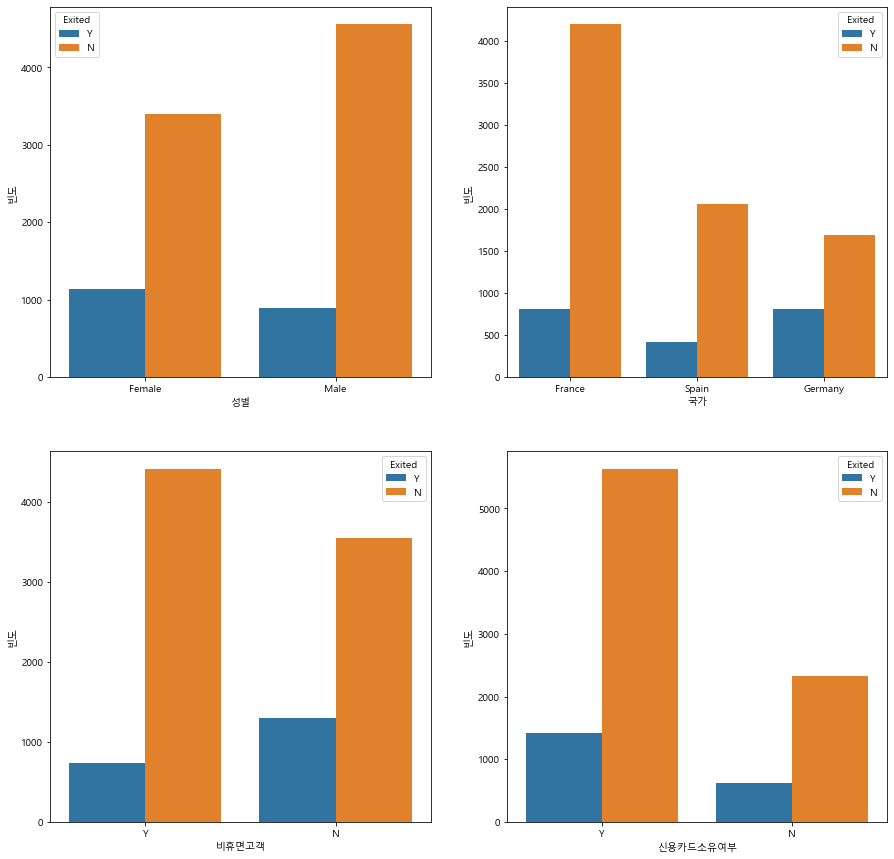

In [40]:
fig

In [41]:
fig.savefig('categorial.png')